<a href="https://colab.research.google.com/github/doommodery/neural/blob/main/%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963_%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_(CNN)_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


**В качестве интерфейса для работы с моделями используйте [Gradio](https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A#scrollTo=-uu_VR8H2K4h)**

[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [1]:
from keras.datasets import fashion_mnist # импорт исходного датасета
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

## 1.2. Разделяем данные на обучающую и тестовую выборку

In [2]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


Нормализация входных данных

In [3]:
from tensorflow import keras

train_X = trainX / 255
test_X = testX / 255

train_Y = keras.utils.to_categorical(trainy, 10) # Перобразование в OneHot Encoding
test_Y = keras.utils.to_categorical(testy, 10) # Перобразование в OneHot Encoding

train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)

print(train_X.shape)
print(test_X.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
print(train_Y)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 1.3. Визуализируем часть данных из датасета

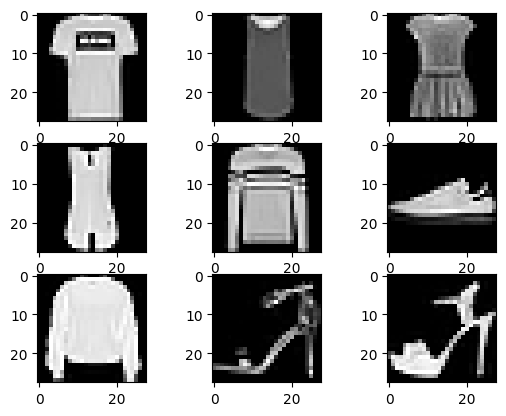

In [5]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [6]:
# Ваш код
model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

## 1.5. Обучаем модель

In [7]:
# Ваш код
EPOCH = 3

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


history = model.fit(train_X, train_Y, batch_size=50, epochs=EPOCH, validation_split=0.2)

Epoch 1/3
960/960 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7764 - loss: 0.6166 - val_accuracy: 0.8789 - val_loss: 0.3328
Epoch 2/3
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8897 - loss: 0.3095 - val_accuracy: 0.8937 - val_loss: 0.2897
Epoch 3/3
960/960 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9099 - loss: 0.2508 - val_accuracy: 0.9067 - val_loss: 0.2628


## 1.6. Анализируем обученную модель. Строим график (графики) обучения

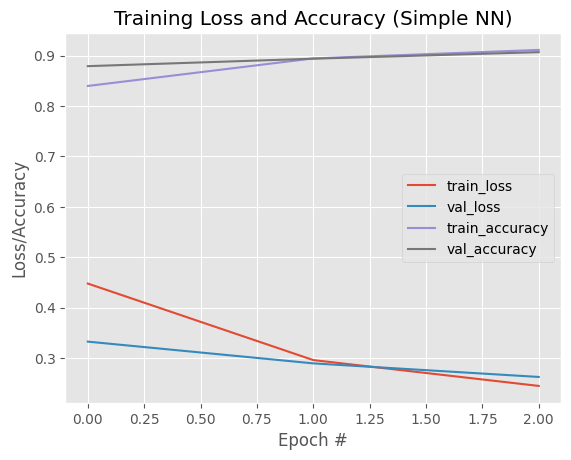

In [8]:
# Ваш код
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 1.7. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



In [9]:
from sklearn.preprocessing import LabelBinarizer
from keras.models import load_model
import pickle

model.save('model_fashion.keras')

labels = LabelBinarizer()
labels.fit_transform(train_Y)

with open('labels_fashion', 'wb') as f:
  f.write(pickle.dumps(labels))

print(labels.classes_)

[0 1 2 3 4 5 6 7 8 9]


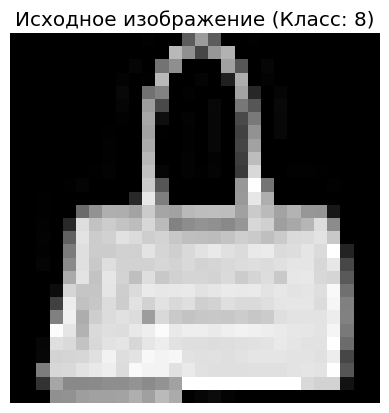

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step

🔍 **Результат предсказания:**
----------------------------------------
Класс          Название            Вероятность
----------------------------------------
0              0                   0.00000
1              1                   0.00000
2              2                   0.00000
3              3                   0.00001
4              4                   0.00000
5              5                   0.00000
6              6                   0.00000
7              7                   0.00000
8              8                   0.99999
9              9                   0.00000
----------------------------------------
🎯 **Лучший прогноз:** 8 (100.00%)


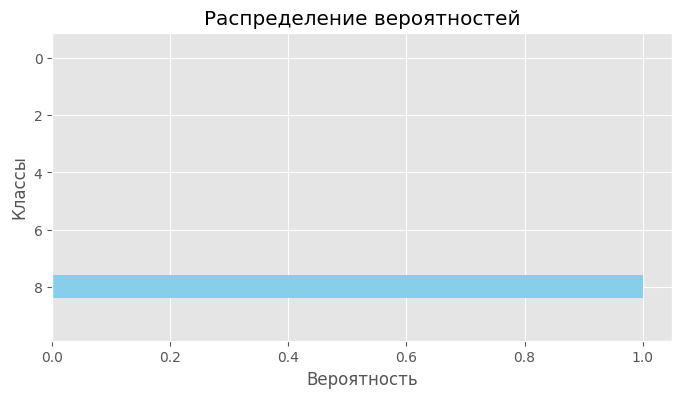

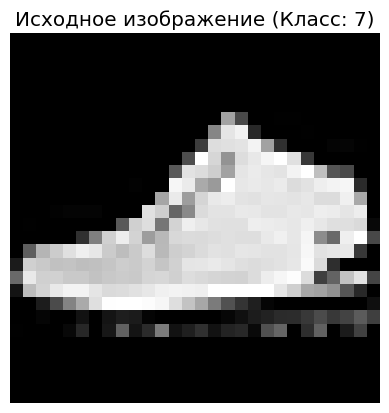

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step

🔍 **Результат предсказания:**
----------------------------------------
Класс          Название            Вероятность
----------------------------------------
0              0                   0.00000
1              1                   0.00000
2              2                   0.00000
3              3                   0.00001
4              4                   0.00000
5              5                   0.00057
6              6                   0.00000
7              7                   0.99453
8              8                   0.00001
9              9                   0.00488
----------------------------------------
🎯 **Лучший прогноз:** 7 (99.45%)


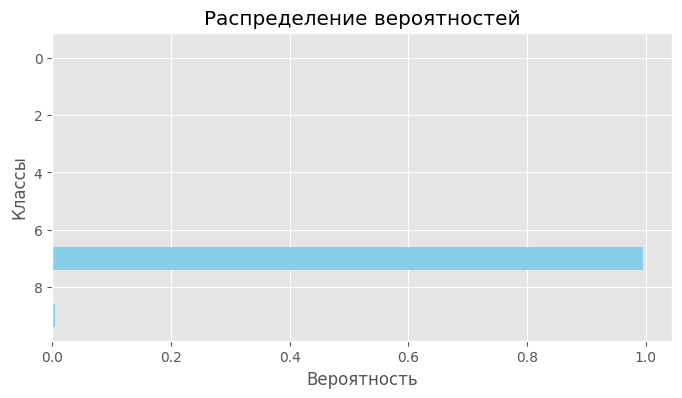

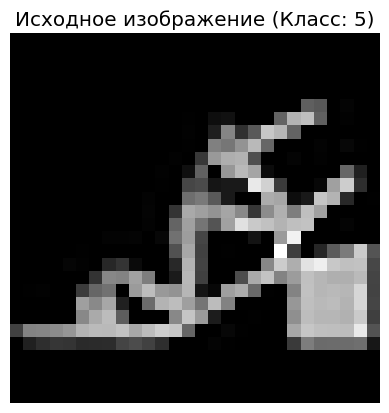

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step

🔍 **Результат предсказания:**
----------------------------------------
Класс          Название            Вероятность
----------------------------------------
0              0                   0.00000
1              1                   0.00000
2              2                   0.00000
3              3                   0.00000
4              4                   0.00000
5              5                   1.00000
6              6                   0.00000
7              7                   0.00000
8              8                   0.00000
9              9                   0.00000
----------------------------------------
🎯 **Лучший прогноз:** 5 (100.00%)


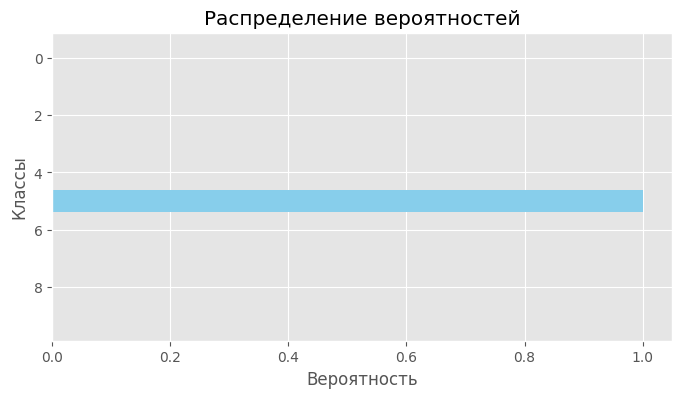

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.models import load_model

def predict_fashion(image, model_path='model_fashion.keras', labels_path='labels_fashion'):
    model = load_model(model_path)
    lb = pickle.loads(open(labels_path, 'rb').read())  # Загружаем лейблы классов

    img = image.reshape(-1, 28, 28, 1)  # Приводим к нужному формату
    preds = model.predict(img)[0]  # Получаем предсказания

    class_names = lb.classes_ if hasattr(lb, "classes_") else [str(i) for i in range(len(preds))]  # Названия классов

    # Выводим предсказания в удобочитаемом виде
    print("\n🔍 **Результат предсказания:**")
    print("-" * 40)
    print(f"{'Класс':<15}{'Название':<20}{'Вероятность'}")
    print("-" * 40)

    for i in range(len(preds)):
        print(f"{i:<15}{class_names[i]:<20}{preds[i]:.5f}")

    best_idx = preds.argmax()
    print("-" * 40)
    print(f"🎯 **Лучший прогноз:** {class_names[best_idx]} ({preds[best_idx]:.2%})")

    # Визуализация предсказаний
    plt.figure(figsize=(8, 4))
    plt.barh(class_names, preds, color='skyblue')
    plt.xlabel("Вероятность")
    plt.ylabel("Классы")
    plt.title("Распределение вероятностей")
    plt.gca().invert_yaxis()
    plt.show()

# --- Тестирование ---
num = np.random.randint(0, 9999, size=3)  # Тестируем 3 случайных примера
for i in range(len(num)):
    plt.imshow(test_X[num[i]], cmap='gray')
    plt.axis('off')
    plt.title(f'Исходное изображение (Класс: {test_Y[num[i]].argmax()})')
    plt.show()

    predict_fashion(test_X[num[i]])  # Вызываем предсказание



# Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету


## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений







In [11]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
imagesPath = sorted(list(paths.list_images('/content/drive/MyDrive/animals/')))
random.shuffle(imagesPath)

In [14]:
def load_images(imagePaths, compression_size = 32):
  """
  Функция для загрузки изображений и преобразования их в векторы признаков.

  Args:
    imagePaths: список путей к изображениям.
    compression_size: размер сжатия изображения

  Returns:
    data: список векторов признаков (сжатых изображений, преобразованных в векторы).
    labels: список меток классов.
  """

  data = []
  labels = []

  for imagePath in imagePaths:
    # Загрузка изображения
    image = cv2.imread(imagePath)

    # Изменение разрешения изображения (по умолчанию 32х32х3 -> 3072,)
    image = cv2.resize(image, (compression_size, compression_size))

    # Добавление изображения в список
    data.append(image)

    # Извлечение метки класса из пути к изображению
    label = imagePath.split(os.path.sep)[-2]

    # Добавление метки в список
    labels.append(label)

  return data, labels

data, labels = load_images(imagesPath, 64)

In [15]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print(data.shape)

(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.1)

lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

print(X_train.shape)
print(X_test.shape)

(532, 64, 64, 3)
(478, 64, 64, 3)
(54, 64, 64, 3)


In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Определение модели
model_my = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Измените на 10 нейронов для 10 классов
])

# Вывод информации о модели
model_my.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,117,962 (8.08 MB)

 Trainable params: 2,117,962 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
print(Y_train.shape)

(478, 10)


In [21]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Reshape

# Flatten the input data
X_train_flattened = X_train.reshape(X_train.shape[0], -1)  # Reshape to (num_samples, 64*64*3)

# Define the model
model_my = Sequential()
model_my.add(Dense(128, activation='relu', input_shape=(64*64*3,)))  # Input shape matches flattened data
model_my.add(Dense(64, activation='relu'))
model_my.add(Dense(10, activation='softmax'))  # Выходной слой для 10x10x10

# Compile the model
model_my.compile(optimizer='adam',
                 loss='categorical_crossentropy',  # Используйте подходящую функцию потерь
                 metrics=['accuracy'])

# Train the model
history = model_my.fit(X_train_flattened, Y_train, batch_size=50, epochs=EPOCH, validation_split=0.2)

Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 310ms/step - accuracy: 0.0976 - loss: 4.4801 - val_accuracy: 0.1146 - val_loss: 3.6886
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1434 - loss: 2.9573 - val_accuracy: 0.0938 - val_loss: 3.1945
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1811 - loss: 2.6521 - val_accuracy: 0.1562 - val_loss: 2.6475


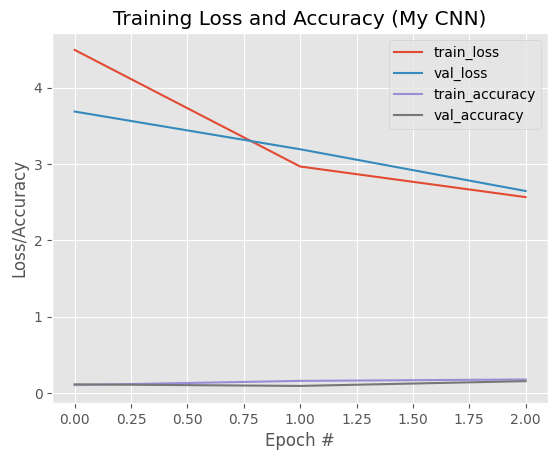

In [22]:
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (My CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [23]:
model_my.save('overfitting_model_my.keras')

Начальные веса, похоже, были очень хорошими и в результате наличия большого количества эпох модель очень сильно переобучилась из-за чего на тренировочной выборке точность достигла порядка 100%, а на валидационной с каждой эпохой падала (и росли потери).

В качестве решения этой проблемы добавлю EarlyStoping, соберу модель и обучу ее заново.

In [24]:
print(Y_train.shape)

(478, 10)


In [30]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical

# Проверка формы Y_train перед обработкой
print("Shape of Y_train before processing:", Y_train.shape)  # (478, 4, 4)

# Преобразуем Y_train в одномерный массив, где каждый элемент представляет класс
Y_train = np.argmax(Y_train, axis=-1)  # Теперь форма (478, 4)

# Если у вас все еще есть лишнее измерение, сжимаем его
if len(Y_train.shape) > 1:
    Y_train = np.argmax(Y_train, axis=-1)  # Теперь форма (478,)

# Убеждаемся, что классы находятся в диапазоне [0, 3]
num_classes = 4
Y_train = np.clip(Y_train, 0, num_classes - 1)  # Ограничиваем индексы

# Преобразуем в one-hot encoding
Y_train = to_categorical(Y_train, num_classes=num_classes)  # Теперь (478, 4)

# Проверка формы после обработки
print("Shape of Y_train after processing:", Y_train.shape)  # Ожидаем (478, 4)

# Определение модели
model_my = Sequential([
    Input(shape=(64, 64, 3)),  # Определяем входной размер
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Выходной слой для 4 классов
])

# Компиляция модели
model_my.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Определение callback-ов
early_stopping = EarlyStopping(patience=5, verbose=1)
checkpoint = ModelCheckpoint(filepath="best_model_my.keras", monitor="val_accuracy", save_best_only=True, verbose=1)

# Обучение модели
history = model_my.fit(X_train, Y_train, batch_size=50, epochs=EPOCH, validation_split=0.2, callbacks=[early_stopping, checkpoint])

Shape of Y_train before processing: (478, 4, 4)
Shape of Y_train after processing: (478, 4)
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.6300 - loss: 0.7914  
Epoch 1: val_accuracy improved from -inf to 0.92708, saving model to best_model_my.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 477ms/step - accuracy: 0.6522 - loss: 0.7619 - val_accuracy: 0.9271 - val_loss: 0.3195
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9591 - loss: 0.2168 
Epoch 2: val_accuracy did not improve from 0.92708
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9590 - loss: 0.2150 - val_accuracy: 0.9271 - val_loss: 0.3243
Epoch 3/3
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9438 - loss: 0.2234  
Epoch 3: val_accuracy did not improve from 0.92708
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9470 - loss: 0.2131 - val_accuracy: 0.9271 - val_loss: 0.2886


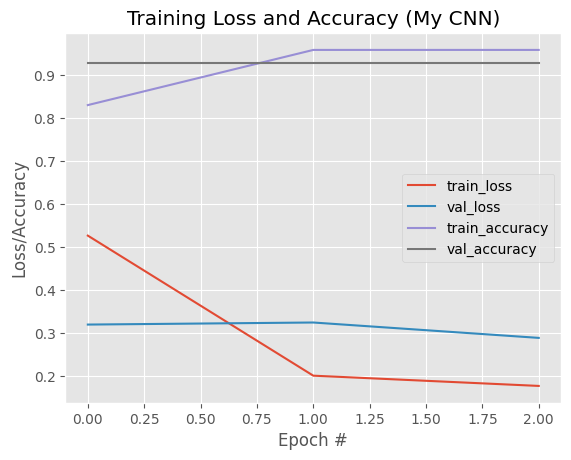

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем массив N с длиной, равной количеству эпох
N = np.arange(0, len(history.history["loss"]))

# Настройка стиля графика
plt.style.use("ggplot")
plt.figure()

# Построение графиков
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")

# Настройка заголовка и подписей
plt.title("Training Loss and Accuracy (My CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# Отображение графика
plt.show()

## 2.2.   Ознакомьтесь с современными архитектурами сверточных нейронных сетей: [см. ссылку](https://medium.com/aiguys/how-cnn-architectures-evolved-c53d3819fef8). На основе рассмотренных архитектур, реализуйте (частично повторяя основные паттерны проектирования) и обучите модель сверточной нейронной сети. Укажите архитектуру, которой Вы "вдохновились"

In [32]:
# Ваш код

model_resnet_like = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

model_resnet_like.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,336,228 (5.10 MB)

 Trainable params: 1,336,228 (5.10 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
EPOCH = 20
checkpoint = ModelCheckpoint(filepath="best_model_resnet_like.keras", monitor="val_accuracy", save_best_only=True, verbose=0)

model_resnet_like.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history_resnet_like = model_resnet_like.fit(X_train, Y_train, batch_size=50, epochs=EPOCH, validation_split=0.2, callbacks=[early_stopping, checkpoint])

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 812ms/step - accuracy: 0.6543 - loss: 0.7829 - val_accuracy: 0.9271 - val_loss: 0.3455
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9601 - loss: 0.2317 - val_accuracy: 0.9271 - val_loss: 0.3276
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9505 - loss: 0.2121 - val_accuracy: 0.9271 - val_loss: 0.3804
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9615 - loss: 0.1797 - val_accuracy: 0.9271 - val_loss: 0.2638
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9710 - loss: 0.1831 - val_accuracy: 0.9271 - val_loss: 0.2459
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9710 - loss: 0.1512 - val_accuracy: 0.9271 - val_loss: 0.2636
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9653 - loss: 0.1345 - val_accuracy: 0.9271 - val_loss: 0.2351
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9679 - loss: 0.1330 - val_accuracy: 0.9271 - val_loss: 0.219

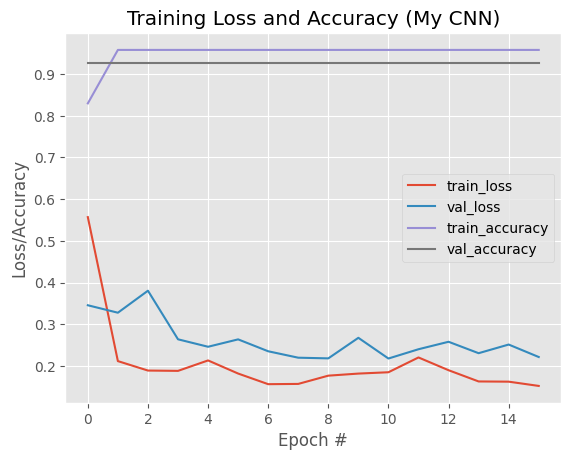

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем массив N с длиной, равной количеству эпох
N = np.arange(0, len(history_resnet_like.history["loss"]))

# Настройка стиля графика
plt.style.use("ggplot")
plt.figure()

# Построение графиков
plt.plot(N, history_resnet_like.history["loss"], label="train_loss")
plt.plot(N, history_resnet_like.history["val_loss"], label="val_loss")
plt.plot(N, history_resnet_like.history["accuracy"], label="train_accuracy")
plt.plot(N, history_resnet_like.history["val_accuracy"], label="val_accuracy")

# Настройка заголовка и подписей
plt.title("Training Loss and Accuracy (My CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# Отображение графика
plt.show()

## 2.3. Сохраните полученные модели

In [ ]:
# сохранены в процессе обучения с помощью чекпоинта

## 2.4. Загрузите обученную модель из прошлой практической работы


In [35]:
# Ваш код
from keras.models import load_model

model_old = load_model('/content/best_model_my.keras')


## 2.5. Сравните между собой точность всех трёх моделей, подавая на вход одинаковые изображения (15 разных изображений). Сравните предсказания каждой из моделей и сделайте выводы

Model 1 Summary:


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,351,566 (24.23 MB)

 Trainable params: 2,117,188 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,234,378 (16.15 MB)


Model 2 Summary:


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,351,566 (24.23 MB)

 Trainable params: 2,117,188 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,234,378 (16.15 MB)


Model 3 Summary:


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,008,686 (15.29 MB)

 Trainable params: 1,336,228 (5.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,672,458 (10.19 MB)

Detected classes: ['cat', 'cow', 'dog', 'elefant', 'farfalla', 'gallina', 'horse', 'pecora', 'spider', 'squirel']
Processing image: e833b60828f5023ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
Model 1 input shape: (1, 64, 64, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
Model 2/3 input shape: (1, 64, 64, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


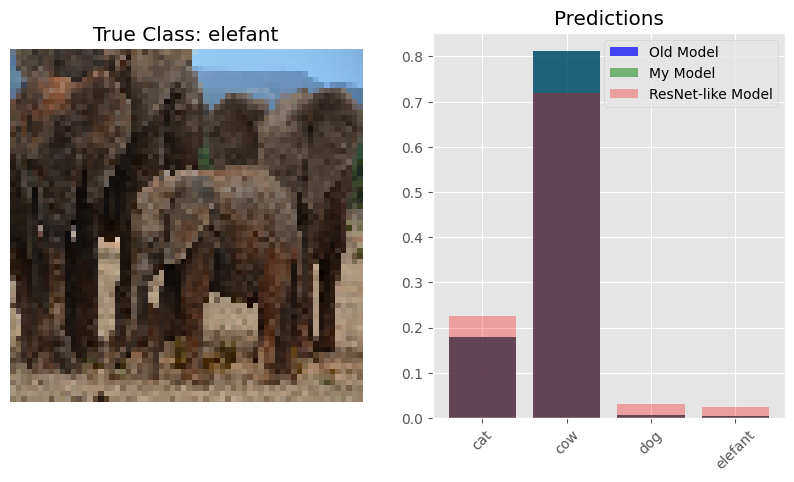

Class	Old_model	My_model	ResNet_like
cat	0.17892		0.17892		0.22621
cow	0.81142		0.81142		0.72001
dog	0.00556		0.00556		0.02996
elefant	0.00410		0.00410		0.02383
Result:	cow		cow		cow

Processing image: e833b90f2cf5033ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
Model 1 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


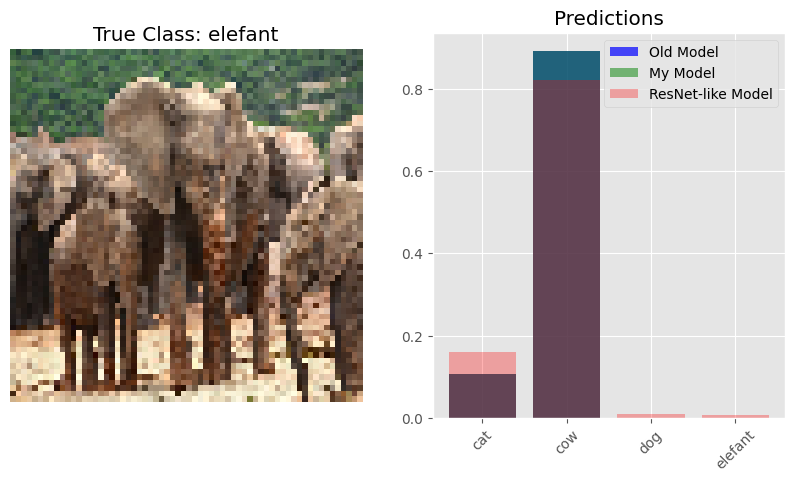

Class	Old_model	My_model	ResNet_like
cat	0.10701		0.10701		0.16112
cow	0.89178		0.89178		0.82194
dog	0.00072		0.00072		0.00989
elefant	0.00048		0.00048		0.00705
Result:	cow		cow		cow

Processing image: e834b20f2cf0083ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
Model 1 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


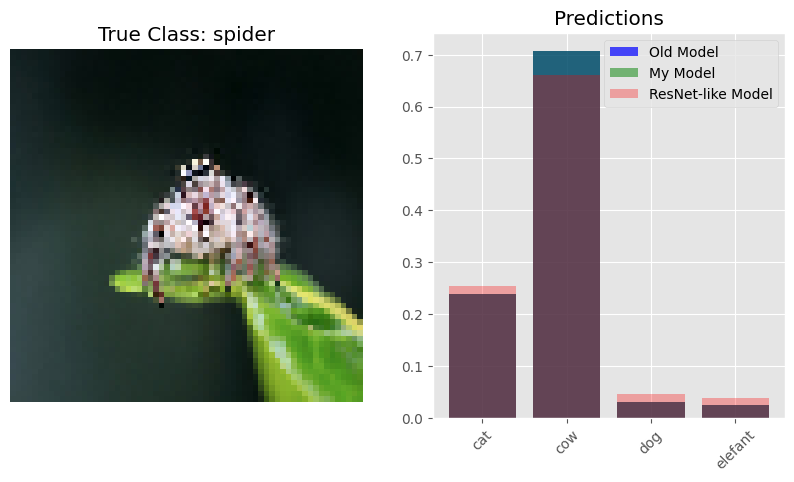

Class	Old_model	My_model	ResNet_like
cat	0.23787		0.23787		0.25405
cow	0.70655		0.70655		0.65989
dog	0.03050		0.03050		0.04693
elefant	0.02508		0.02508		0.03913
Result:	cow		cow		cow

Processing image: OIP-_LTqtCctZiQNdcmxKsvp7QHaEm.jpeg
Model 1 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


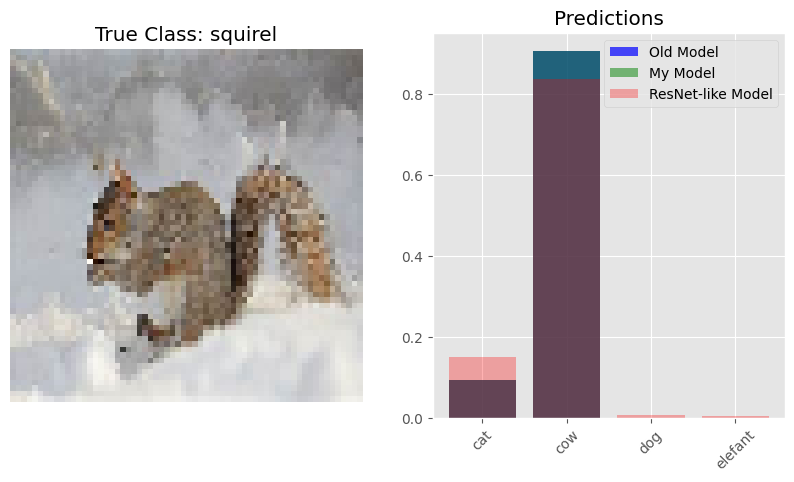

Class	Old_model	My_model	ResNet_like
cat	0.09295		0.09295		0.14944
cow	0.90605		0.90605		0.83690
dog	0.00061		0.00061		0.00807
elefant	0.00039		0.00039		0.00559
Result:	cow		cow		cow

Processing image: OIP-00qwuq8LDwY8bqltA0QfzwHaLF.jpeg
Model 1 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


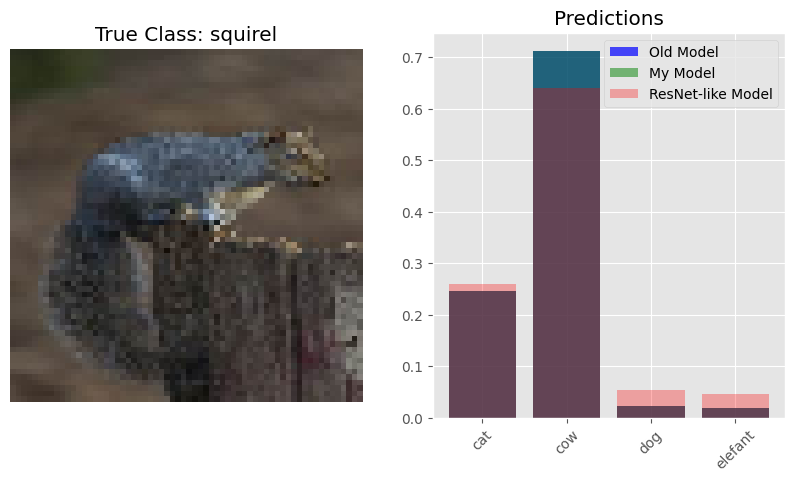

Class	Old_model	My_model	ResNet_like
cat	0.24538		0.24538		0.25930
cow	0.71163		0.71163		0.64089
dog	0.02384		0.02384		0.05428
elefant	0.01915		0.01915		0.04553
Result:	cow		cow		cow

Processing image: OIP-_CQqIFuqYBUN7Vj205cWBgHaEK.jpeg
Model 1 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


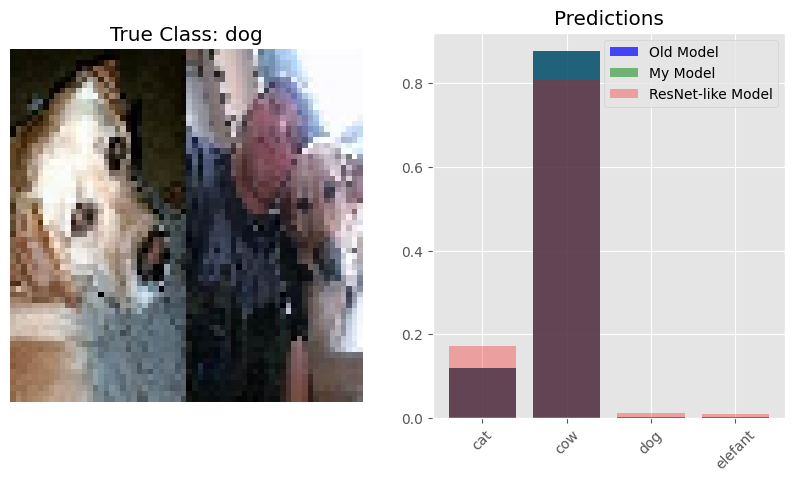

Class	Old_model	My_model	ResNet_like
cat	0.12009		0.12009		0.17156
cow	0.87689		0.87689		0.80836
dog	0.00182		0.00182		0.01161
elefant	0.00120		0.00120		0.00847
Result:	cow		cow		cow

Processing image: OIP-_rrv_V15DKZfeeu0YZ_xVAHaHq.jpeg
Model 1 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


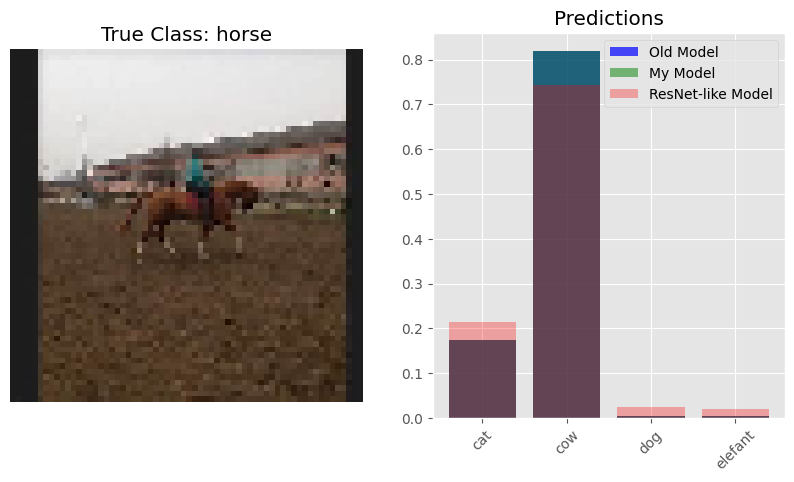

Class	Old_model	My_model	ResNet_like
cat	0.17321		0.17321		0.21408
cow	0.81857		0.81857		0.74311
dog	0.00484		0.00484		0.02388
elefant	0.00338		0.00338		0.01893
Result:	cow		cow		cow

Processing image: ea34b20d2af1063ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
Model 1 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


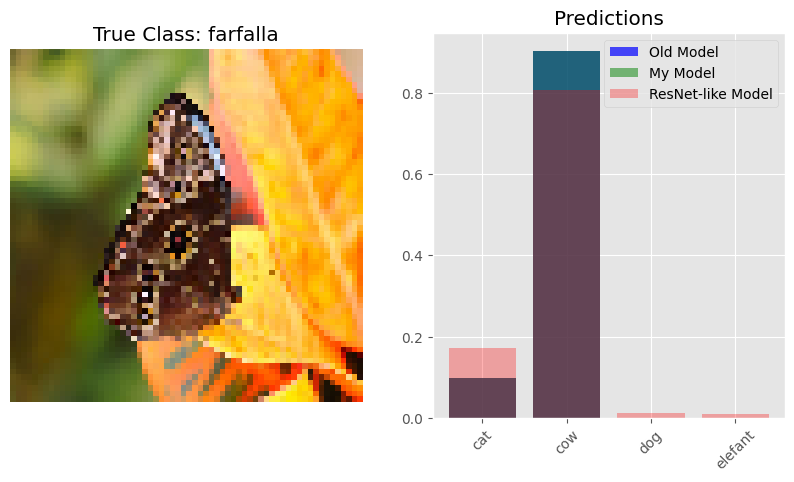

Class	Old_model	My_model	ResNet_like
cat	0.09710		0.09710		0.17271
cow	0.90227		0.90227		0.80608
dog	0.00039		0.00039		0.01200
elefant	0.00025		0.00025		0.00921
Result:	cow		cow		cow

Processing image: OIP--_miqJwiTIao0aZytuqccgHaFj.jpeg
Model 1 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


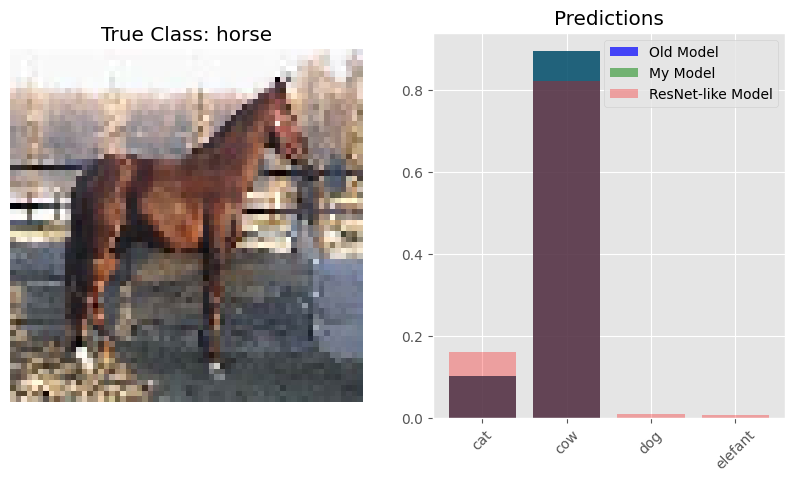

Class	Old_model	My_model	ResNet_like
cat	0.10340		0.10340		0.15996
cow	0.89531		0.89531		0.82364
dog	0.00080		0.00080		0.00953
elefant	0.00049		0.00049		0.00687
Result:	cow		cow		cow

Processing image: OIP-0T8A92vWXyIYCcmBW8BnmgHaEH.jpeg
Model 1 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


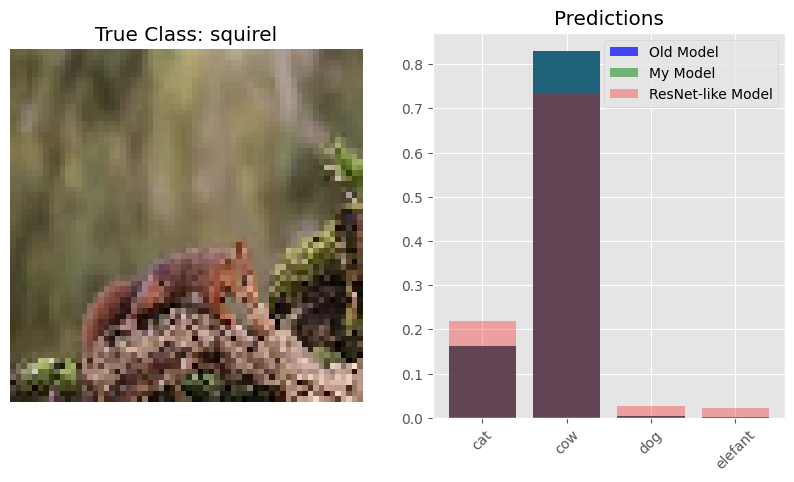

Class	Old_model	My_model	ResNet_like
cat	0.16376		0.16376		0.21836
cow	0.82948		0.82948		0.73177
dog	0.00397		0.00397		0.02791
elefant	0.00279		0.00279		0.02195
Result:	cow		cow		cow

Processing image: e83db20a2ff1093ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
Model 1 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


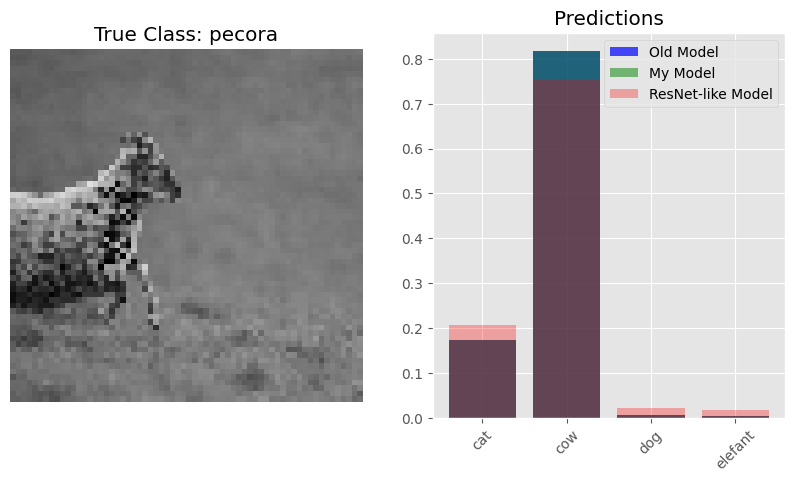

Class	Old_model	My_model	ResNet_like
cat	0.17384		0.17384		0.20629
cow	0.81670		0.81670		0.75519
dog	0.00545		0.00545		0.02185
elefant	0.00400		0.00400		0.01667
Result:	cow		cow		cow

Processing image: OIP-_Ak1D4zfh6zUMwvOVfNg0AHaFj.jpeg
Model 1 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


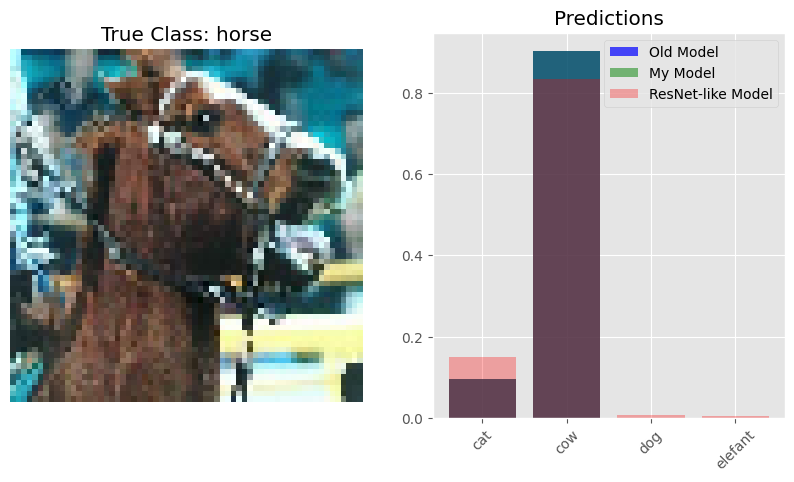

Class	Old_model	My_model	ResNet_like
cat	0.09564		0.09564		0.15078
cow	0.90308		0.90308		0.83507
dog	0.00078		0.00078		0.00834
elefant	0.00051		0.00051		0.00581
Result:	cow		cow		cow

Processing image: OIP-_D3-N3Sj3HgppjvytfskkgHaE8.jpeg
Model 1 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


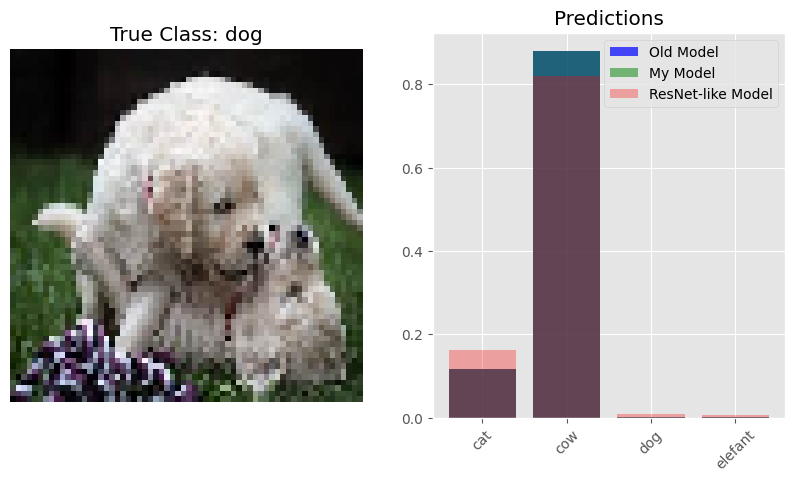

Class	Old_model	My_model	ResNet_like
cat	0.11789		0.11789		0.16270
cow	0.87901		0.87901		0.82042
dog	0.00185		0.00185		0.00982
elefant	0.00125		0.00125		0.00706
Result:	cow		cow		cow

Processing image: OIP-_WyHKgREia-4VijlL6DNswHaFj.jpeg
Model 1 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


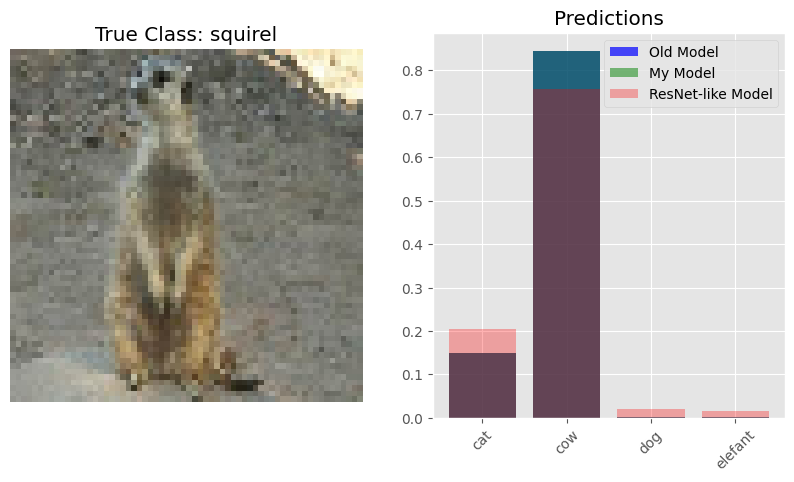

Class	Old_model	My_model	ResNet_like
cat	0.15036		0.15036		0.20402
cow	0.84415		0.84415		0.75819
dog	0.00323		0.00323		0.02136
elefant	0.00227		0.00227		0.01642
Result:	cow		cow		cow

Processing image: OIP--7-usponNbvCN-VhqThI1gHaFj.jpeg
Model 1 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Model 2/3 input shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


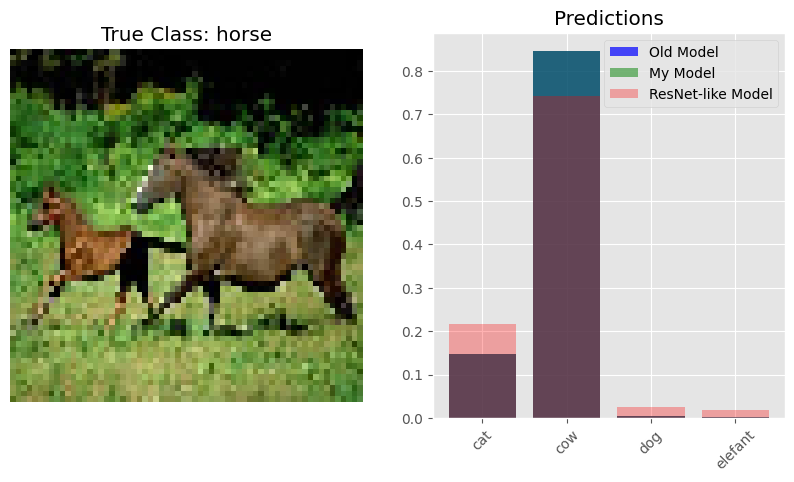

Class	Old_model	My_model	ResNet_like
cat	0.14765		0.14765		0.21530
cow	0.84513		0.84513		0.74138
dog	0.00421		0.00421		0.02434
elefant	0.00301		0.00301		0.01898
Result:	cow		cow		cow


Final Accuracy:
Old Model Accuracy: 0.00%
My Model Accuracy: 0.00%
ResNet-like Model Accuracy: 0.00%


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from imutils import paths
import random
import os

# Загрузка моделей
model_1 = load_model('/content/best_model_my.keras')  # Модель 1
model_2 = load_model('/content/best_model_my.keras')  # Модель 2
model_3 = load_model('/content/best_model_resnet_like.keras')  # Модель 3

# Проверка архитектуры моделей
print("Model 1 Summary:")
model_1.summary()

print("\nModel 2 Summary:")
model_2.summary()

print("\nModel 3 Summary:")
model_3.summary()

# Функция для загрузки и подготовки изображений
def load_and_prepare_image(image_path, target_size=(64, 64)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0  # Нормализация
    return img_array

# Функция для предсказания
def predict_image(img_array, model):
    if model == model_1:
        # Для модели 1: используем формат (1, 64, 64, 3)
        img_input = img_array.reshape((1, 64, 64, 3))
        print(f"Model 1 input shape: {img_input.shape}")  # Отладочное сообщение
    else:
        # Для моделей 2 и 3: используем формат (1, 64, 64, 3)
        img_input = img_array.reshape((1, 64, 64, 3))
        print(f"Model 2/3 input shape: {img_input.shape}")  # Отладочное сообщение
    preds = model.predict(img_input)[0]
    return preds

# Путь к директории с изображениями
imagesPath = sorted(list(paths.list_images('/content/drive/MyDrive/animals/')))
random.shuffle(imagesPath)  # Перемешиваем изображения

# Автоматическое создание списка классов из структуры директорий
class_labels = sorted(os.listdir('/content/drive/MyDrive/animals/'))
print("Detected classes:", class_labels)

# Ограничиваемся 15 изображениями
images_to_test = imagesPath[:15]

# Сравнение моделей
results = {
    'model_1_correct': 0,
    'model_2_correct': 0,
    'model_3_correct': 0,
}

# Обработка изображений
for img_path in images_to_test:
    print(f"Processing image: {os.path.basename(img_path)}")
    img_array = load_and_prepare_image(img_path)

    # Получаем истинный класс из пути
    true_class = os.path.basename(os.path.dirname(img_path))  # Например, 'cat', 'dog' и т.д.

    # Пропускаем изображения с неизвестными классами
    if true_class not in class_labels:
        print(f"Skipping image {os.path.basename(img_path)}: unknown class '{true_class}'")
        continue

    true_class_idx = class_labels.index(true_class)  # Индекс истинного класса

    # Предсказания моделей
    preds_1 = predict_image(img_array, model_1)
    preds_2 = predict_image(img_array, model_2)
    preds_3 = predict_image(img_array, model_3)

    # Сравнение предсказаний с истинным классом
    if np.argmax(preds_1) == true_class_idx:
        results['model_1_correct'] += 1
    if np.argmax(preds_2) == true_class_idx:
        results['model_2_correct'] += 1
    if np.argmax(preds_3) == true_class_idx:
        results['model_3_correct'] += 1

    # Визуализация результатов для текущего изображения
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array)
    plt.axis('off')
    plt.title(f"True Class: {true_class}")

    plt.subplot(1, 2, 2)
    # Используем только первые 4 класса для гистограммы
    plt.bar(class_labels[:4], preds_1, color='blue', alpha=0.7, label='Old Model')
    plt.bar(class_labels[:4], preds_2, color='green', alpha=0.5, label='My Model')
    plt.bar(class_labels[:4], preds_3, color='red', alpha=0.3, label='ResNet-like Model')
    plt.xticks(rotation=45)
    plt.title("Predictions")
    plt.legend()
    plt.show()

    # Вывод предсказаний
    print('Class\tOld_model\tMy_model\tResNet_like')
    for i in range(len(preds_1)):
        print(f'{class_labels[i]}\t{preds_1[i]:.5f}\t\t{preds_2[i]:.5f}\t\t{preds_3[i]:.5f}')
    print(f'Result:\t{class_labels[np.argmax(preds_1)]}\t\t{class_labels[np.argmax(preds_2)]}\t\t{class_labels[np.argmax(preds_3)]}\n')

# Вывод итоговой точности
total_images = len(images_to_test)
print("\nFinal Accuracy:")
print(f"Old Model Accuracy: {results['model_1_correct'] / total_images * 100:.2f}%")
print(f"My Model Accuracy: {results['model_2_correct'] / total_images * 100:.2f}%")
print(f"ResNet-like Model Accuracy: {results['model_3_correct'] / total_images * 100:.2f}%")

# Задание №3*. Использование глубокой сверточной нейронной сети для восстановления изображения

## 3.1. Работа с данными

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [40]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

In [38]:
train.shape

(320, 4096)

Сейчас изображение - это вектор, имеющий размерность 4096.

In [41]:
# Ваш код здесь

train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

test.shape

(80, 64, 64)

### 3.1.2. Отрисуйте несколько примеров

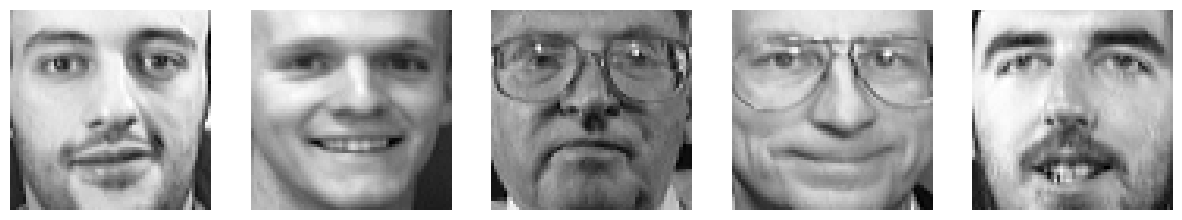

In [42]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [43]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [44]:
X_train.shape

(320, 32, 64)

Вот один пример обучающей пары.

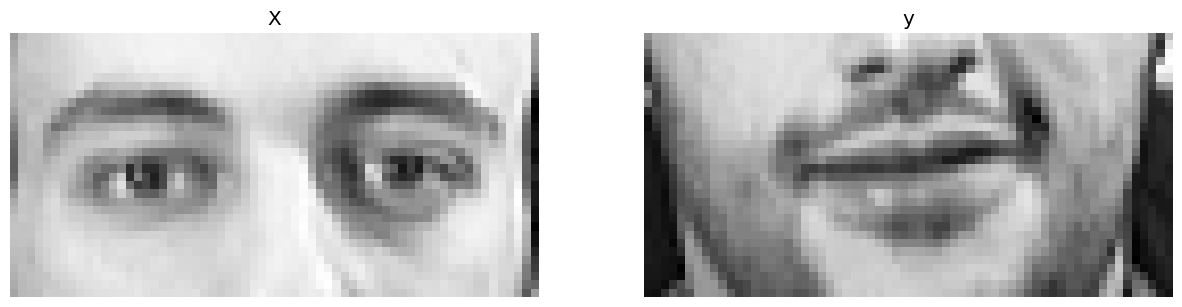

In [45]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

### 3.1.3. Измените размерность y
Остается только изменить размерность y, т.к. сейчас $y$ - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048.

In [46]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_train_n.shape

(320, 2048)

## 3.2. Создайте архитектуру для этой задачи

In [47]:
# Ваш код здесь
model_rec = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32, 64, 1)),
    MaxPooling2D((2,2), strides=2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=2),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=2),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(1024, activation='relu'),

    Dense(2048, activation='sigmoid'),
])

model_rec.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 32, 64, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 16, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 16, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 8, 16, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 8, 16, 256)          │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 4, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 2048)                │       2,099,200 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,188,992 (27.42 MB)

 Trainable params: 7,188,992 (27.42 MB)

 Non-trainable params: 0 (0.00 B)

## 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [48]:
# Ваш код здесь
model_rec.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

## 3.4. Обучите нейросеть

Выберите нужное количество эпох.


In [49]:
# Ваш код здесь
EPOCH = 100

checkpoint = ModelCheckpoint(filepath="best_model_rec.keras", monitor="val_accuracy", save_best_only=True, verbose=0)

history_rec = model_rec.fit(X_train, y_train_n, batch_size=32, epochs=EPOCH, validation_split=0.2, callbacks=[early_stopping, checkpoint])

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.0000e+00 - loss: 0.0254 - val_accuracy: 0.0000e+00 - val_loss: 0.0218
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.0083 - loss: 0.0212 - val_accuracy: 0.0156 - val_loss: 0.0218
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0209 - loss: 0.0207 - val_accuracy: 0.0156 - val_loss: 0.0214
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0019 - loss: 0.0202 - val_accuracy: 0.0000e+00 - val_loss: 0.0217
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0040 - loss: 0.0200 - val_accuracy: 0.0000e+00 - val_loss: 0.0214
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 8.6806e-04 - loss: 0.0194 - val_accuracy: 0.0000e+00 - val_loss: 0.0213
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0061 - loss: 0.0206 - val_accuracy: 0.0156 - val_loss: 0.0211
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0134 - loss: 0.0193 - val_acc

## 3.5. Сделайте предсказания на тестовых данных

In [50]:
# Ваш код здесь
preds = model_rec.predict(X_test, batch_size=10)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step  


## 3.6. Посчитайте метрику качества на тестовых данных

In [51]:
# Ваш код здесь

from sklearn.metrics import mean_squared_error

mean_squared_error(preds, y_test_n)

0.009037534706294537

## 3.7. Преобразуйте предсказанные векторы в двумерное изображение (поменяйте их размерность)

In [52]:
preds.shape

(80, 2048)

In [53]:
# Ваш код здесь
pred_test = preds.reshape(preds.shape[0], 32, 64)

Отрисуйте все предсказания.

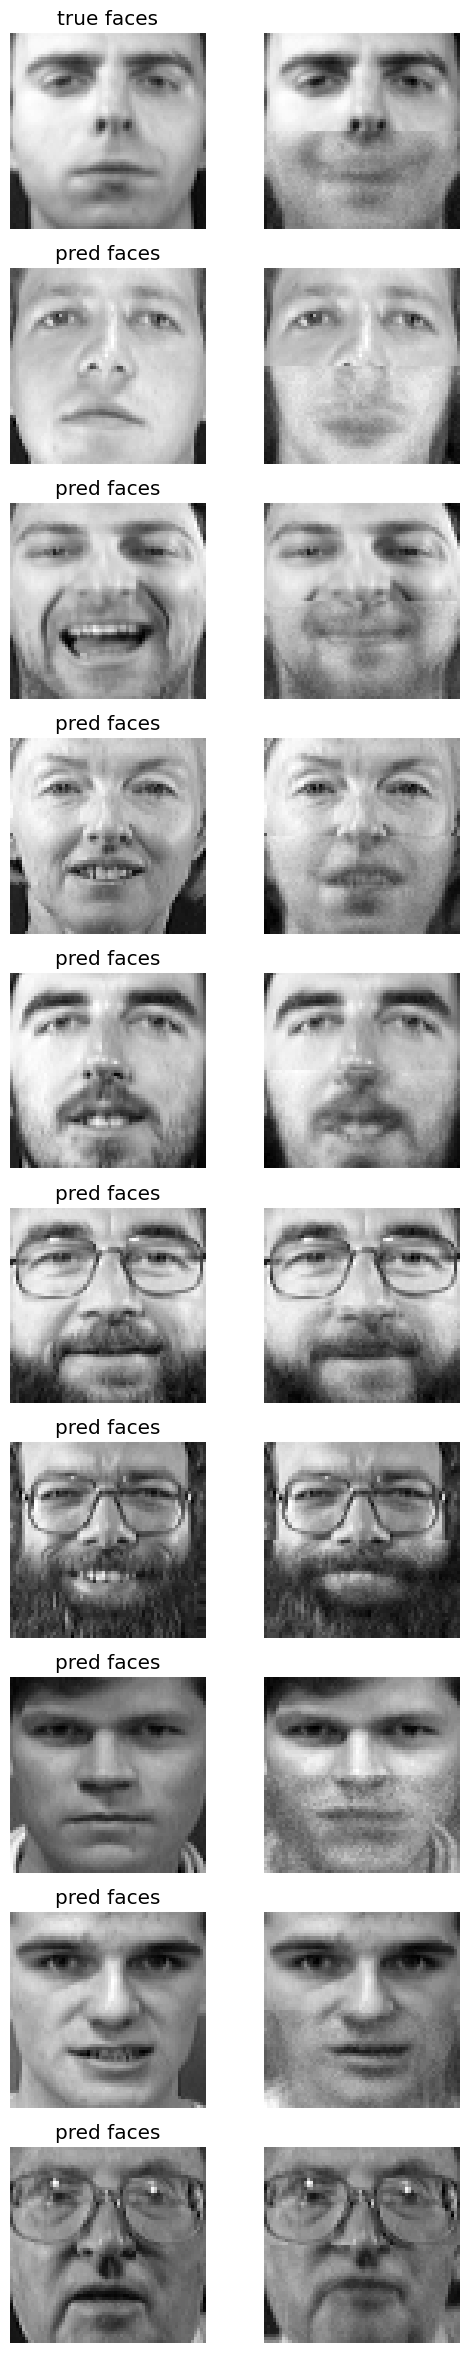

In [54]:
# Пример кода:

n_faces = 10
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(10):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title='pred faces')
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], pred_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )